# Homework 11

You'll want to visit the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation. Download the **All Licenses** dataset.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [414]:
import pandas as pd
%matplotlib inline

## 1. Open the file

In [415]:
df = pd.read_csv("licfile.csv")
df.head()

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,08102017,"RISINGER, JIM MARVIN.1",7668 S US HWY 59,Unnamed: 11,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,Unnamed: 17,N
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, set your own column names** using the content from the "File format" link on the [data page you were just on](https://www.license.state.tx.us/licensesearch/licfile.asp). 

**Note:** Only *some* of that page is column headers, the rest explains license types.

**Note 2:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

In [416]:
colnames = [
    "LICTYPE",
    "LICNUMBER",
    "BIZCOUNTY",
    "BIZNAME",
    "BIZLINE1",
    "BIZLINE2",
    "BIZCITYSTATE",
    "BIZTELEPHONE",
    "EXPIRATION",
    "OWNER",
    "MAILLINE1",
    "MAILLINE2",
    "MAILCITYSTATE",
    "MAILCOUNTYCODE",
    "MAILCOUNTY",
    "MAILZIP",
    "TELEPHONE",
    "LICSUBTYPE",
    "CEFLAG",
]
df = pd.read_csv("licfile.csv", names=colnames)
df.head()

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,8102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,347.0,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N


# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [417]:
colnames = [
    "LICTYPE",
    "LICNUMBER",
    "BIZCOUNTY",
    "BIZNAME",
    "BIZLINE1",
    "BIZLINE2",
    "BIZCITYSTATE",
    "BIZTELEPHONE",
    "EXPIRATION",
    "OWNER",
    "MAILLINE1",
    "MAILLINE2",
    "MAILCITYSTATE",
    "MAILCOUNTYCODE",
    "MAILCOUNTY",
    "MAILZIP",
    "TELEPHONE",
    "LICSUBTYPE",
    "CEFLAG",
]
df = pd.read_csv("licfile.csv", names=colnames,  dtype={'EXPIRATION': str, "LICNUMBER": str, "MAILCOUNTYCODE": str, "MAILZIP": str, "TELEPHONE": str})
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,08102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,09262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,02252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N


Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

In [473]:
df.dtypes

LICTYPE            object
LICNUMBER          object
BIZCOUNTY          object
BIZNAME            object
BIZLINE1          float64
BIZLINE2          float64
BIZCITYSTATE      float64
BIZTELEPHONE      float64
EXPIRATION         object
OWNER              object
MAILLINE1          object
MAILLINE2          object
MAILCITYSTATE      object
MAILCOUNTYCODE     object
MAILCOUNTY         object
MAILZIP            object
TELEPHONE          object
LICSUBTYPE         object
CEFLAG             object
dtype: object

## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

List slicing forever! It's the thing with the `[]`. There are like five ways to do this one.

In [479]:
df['EXPIRATION'] = df['EXPIRATION'].str[-4:] + "-" + df['EXPIRATION'].str[:2] + "-" + df['EXPIRATION'].str[2:4]

Check the first five expirations to make sure they look right.

In [480]:
df['EXPIRATION'].head()

0    2017-08-10
1    2017-12-29
2    2017-09-26
3    2017-11-04
4    2018-02-25
Name: EXPIRATION, dtype: object

# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [419]:
df.LICTYPE.value_counts().head(10)

Cosmetology Operator        151206
Apprentice Electrician      110593
Cosmetology Manicurist       49563
Journeyman Electrician       38170
A/C Technician               27959
Cosmetology Esthetician      23613
Cosmetology Beauty Salon     23577
Master Electrician           16810
A/C Contractor               16376
Barber, Class A              16019
Name: LICTYPE, dtype: int64

## 6. What are the top 10 least common?

In [420]:
df.LICTYPE.value_counts().sort_values().head()

Legal Service Contract Admin                      1
Licensed Court Interpreter CE Provider            2
Mobile Cosmetology Esthetician/Manicure Saloon    2
Cosmetology Wig Instructor                        2
Mobile Cosmetology Manicure Specialty Saloon      2
Name: LICTYPE, dtype: int64

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [421]:
# Yes I know I left this in here, it's a learning experience!
df[df['LICTYPE'].str.contains("Electrician")]

ValueError: cannot index with vector containing NA / NaN values

## 8. How many of the rows of LICTYPE are NaN?

In [483]:
df['LICTYPE'].isnull().value_counts()

False    590730
True       7086
Name: LICTYPE, dtype: int64

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

In [ ]:
df['LICTYPE'].str.contains("Electrician").value_counts(dropna=False)

This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

In [ ]:
df[df['LICTYPE'].str.contains("Electrician").fillna(False)]

## 10. What's the most popular kind of electrician?

In [ ]:
df[df['LICTYPE'].str.contains("Electrician").fillna(False)]['LICTYPE'].value_counts()

## 11. Graph it, with the largest bar on top.

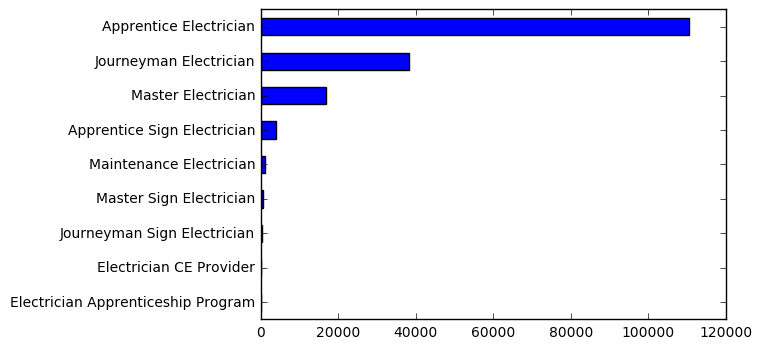

In [484]:
df[df['LICTYPE'].str.contains("Electrician").fillna(False)]['LICTYPE'].value_counts().sort_values().plot(kind='barh')

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [485]:
len(df[df['LICTYPE'].str.contains("Sign Electrician").fillna(False)])

4927

# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before.

We're going to use `.fillna('')` to replace every empty owner name with an empty string, otherwise our code will break, since you can't, for example, capitalize `NaN`.

In [486]:
# You'll use .apply for this one, here's an example reminder of how it works
df['OWNER'].fillna('').apply(lambda name: name.upper())

0               RISINGER, JIM MARVIN
1                WILLIAMS, JON ANDRE
2              GUEVARA, JUAN ANTONIO
3           BOWERS, JAMES BRISCOE II
4                DEMSKY, JOHN EDWARD
5                  THOMPSON, RANDY D
6                 TUCKER, MONTE EARL
7               COOPER, THOMAS JAMES
8            BLANKENSHIP, KERRY NEIL
9             DAWES, NICHOLAS MORGAN
10              LESTER, TIMMY EUGENE
11               MANCILL, MARK DUANE
12            HUDDLESTON, SHAWN ALAN
13              JORDAN, JAMES EUGENE
14            IRWIN, MICHAEL RICHARD
15                 HALL, WESLEY RYON
16                JAMES, BACHUS ROSS
17              SIDAWI, JOSEPH JAMES
18                SMITH, DAVID JAMES
19              FERGUSON, JACKIE LEE
20               MCKINLEY, MATTHEW D
21               SOWELL, KALEN BRICE
22                SEVIER, VIRGINIA A
23                 SOMERVILLE, CAL W
24            BARCLIFT, AUSTIN TYLER
25               FORD, PATRICIA NORA
26             SCHAFER, TIMOTHY RYAN
2

In [487]:
df['OWNER'].fillna('').apply(lambda name: name.split(',')[0]).head()

0    RISINGER
1    WILLIAMS
2     GUEVARA
3      BOWERS
4      DEMSKY
Name: OWNER, dtype: object

## 14. Save it into a new column and check to make sure it exists

In [488]:
df['LASTNAME'] = df['OWNER'].fillna('').apply(lambda name: name.split(',')[0])

In [489]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY


# 15. What are the ten most popular last names?

In [490]:
df['LASTNAME'].value_counts().head(10)

NGUYEN       22286
TRAN          8137
LE            5606
GARCIA        5574
MARTINEZ      4701
RODRIGUEZ     4626
HERNANDEZ     4390
PHAM          3997
GONZALEZ      3634
SMITH         3208
Name: LASTNAME, dtype: int64

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [491]:
df[df['LASTNAME'] == 'NGUYEN'].LICTYPE.value_counts().head()

Cosmetology Manicurist     12856
Cosmetology Operator        4039
Cosmetology Esthetician     2881
Cosmetologist               1876
Apprentice Electrician       195
Name: LICTYPE, dtype: int64

In [492]:
df[df['LASTNAME'] == 'TRAN'].LICTYPE.value_counts().head()

Cosmetology Manicurist     4675
Cosmetology Operator       1475
Cosmetology Esthetician    1032
Cosmetologist               712
Apprentice Electrician       95
Name: LICTYPE, dtype: int64

In [493]:
df[df['LASTNAME'] == 'LE'].LICTYPE.value_counts().head()

Cosmetology Manicurist     3277
Cosmetology Operator        953
Cosmetology Esthetician     730
Cosmetologist               497
A/C Technician               43
Name: LICTYPE, dtype: int64

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

In [494]:
df[df.LASTNAME.isin(['NGUYEN', 'TRAN', 'LE'])].LICTYPE.value_counts().head()

Cosmetology Manicurist     20808
Cosmetology Operator        6467
Cosmetology Esthetician     4643
Cosmetologist               3085
Apprentice Electrician       327
Name: LICTYPE, dtype: int64

## 18. Most popular licenses for Garcia? Rodriguez? Martinez?

Those are the 3 most common last names for self-identifying Hispanics in the USA.

In [495]:
df[df.LASTNAME == 'GARCIA'].LICTYPE.value_counts().head()

Apprentice Electrician    1952
Cosmetology Operator      1672
Journeyman Electrician     493
A/C Technician             333
Barber, Class A            186
Name: LICTYPE, dtype: int64

In [496]:
df[df.LASTNAME == 'MARTINEZ'].LICTYPE.value_counts().head()

Apprentice Electrician    1618
Cosmetology Operator      1388
Journeyman Electrician     387
A/C Technician             317
Barber, Class A            149
Name: LICTYPE, dtype: int64

In [497]:
df[df.LASTNAME == 'RODRIGUEZ'].LICTYPE.value_counts().head()

Apprentice Electrician    1573
Cosmetology Operator      1391
Journeyman Electrician     386
A/C Technician             320
Barber, Class A            138
Name: LICTYPE, dtype: int64

## 19. Most popular license for anyone with a last name that ENDS in `-ez`

The answer is not `.str.contains('ez')`, but it isn't necessarily too different. **Make sure your numbers match mine.**

One way involves googling, the other way involves regular expressions. If you with the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [498]:
df[df.LASTNAME.str.contains('EZ$', regex=True)].LICTYPE.value_counts().head()

Apprentice Electrician    16065
Cosmetology Operator      13887
Journeyman Electrician     3529
A/C Technician             2889
Barber, Class A            1277
Name: LICTYPE, dtype: int64

## 20. Get that as a percentage

In [ ]:
df[df.LASTNAME.str.contains('EZ$', regex=True)].LICTYPE.value_counts(normalize=True).head()

# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [ ]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

In [ ]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

In [ ]:
# Save it into a new column
sample_df['age'] = sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)
sample_df.head()

**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

In [ ]:
df['OWNER'].head(10)

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

In [ ]:
df['OWNER'].str.extract(", (.*) ", expand=False).head(20)

## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

In [508]:
df['FIRSTNAME'] = df['OWNER'].str.extract(", (.*?) ", expand=False)
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME,FIRSTNAME
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",...,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER,JIM
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",...,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS,JON
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",...,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA,JUAN
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",...,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS,JAMES
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",...,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY,JOHN


# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [509]:
df.FIRSTNAME.isnull().value_counts()

False    385511
True     212305
Name: FIRSTNAME, dtype: int64

What do their names look like?

In [510]:
df[df.FIRSTNAME.isnull()]

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME,FIRSTNAME
29,Associate Auctioneer,17699,EL PASO,"MARTINEZ, ARTURO",NaN,NaN,NaN,NaN,2017-04-18,"MARTINEZ, ARTURO",...,NaN,EL PASO TX 79912-2104,0141,EL PASO,79912,9153733887,NaN,N,MARTINEZ,NaN
63,A/C Technician,104,TITUS,"VANGINAULT, FREDDY",NaN,NaN,NaN,NaN,2017-05-06,"VANGINAULT, FREDDY",...,NaN,NaN,NaN,TITUS,75455,NaN,CER,N,VANGINAULT,NaN
64,A/C Technician,105,UPSHUR,"VANSICKLE, MICHAEL",NaN,NaN,NaN,NaN,2017-05-17,"VANSICKLE, MICHAEL",...,NaN,NaN,NaN,UPSHUR,75644,NaN,CER,N,VANSICKLE,NaN
73,A/C Technician,143,HOPKINS,"COFFMAN, ERICK",NaN,NaN,NaN,NaN,2017-07-10,"COFFMAN, ERICK",...,NaN,NaN,NaN,HOPKINS,75437,NaN,REG,N,COFFMAN,NaN
76,A/C Technician,147,WILLIAMSON,"HUNTER, SCOTT",NaN,NaN,NaN,NaN,2018-01-23,"HUNTER, SCOTT",...,NaN,NaN,NaN,WILLIAMSON,78626,NaN,REG,N,HUNTER,NaN
77,A/C Technician,157,BASTROP,"WATTS, EDWARD",NaN,NaN,NaN,NaN,2018-02-06,"WATTS, EDWARD",...,NaN,NaN,NaN,BASTROP,78602,NaN,REG,N,WATTS,NaN
87,A/C Technician,192,TAYLOR,"SERRATO, ZENON",NaN,NaN,NaN,NaN,2017-09-12,"SERRATO, ZENON",...,NaN,NaN,NaN,TAYLOR,79601,NaN,REG,N,SERRATO,NaN
92,A/C Technician,207,GREGG,"ASHLEY, WAYNE",NaN,NaN,NaN,NaN,2018-01-28,"ASHLEY, WAYNE",...,NaN,NaN,NaN,GREGG,75604,NaN,REG,N,ASHLEY,NaN
96,A/C Technician,239,DENTON,"MARSLAND, RICHARD",NaN,NaN,NaN,NaN,2017-05-11,"MARSLAND, RICHARD",...,NaN,NaN,NaN,DENTON,76262,NaN,REG,N,MARSLAND,NaN
109,A/C Technician,283,HARRIS,"RICHARD, MEDINA",NaN,NaN,NaN,NaN,2017-05-13,"RICHARD, MEDINA",...,NaN,NaN,NaN,HARRIS,77038,NaN,REG,N,RICHARD,NaN


## 24. Fix it (if you'd like)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use the `df.loc` thing we've been doing in class. I'll write it here because I can't even always remember it.

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people who don't already have one.

In [511]:
df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = df['OWNER'].str.extract(", (.*)", expand=False)

How did I do with my update?

In [512]:
df.FIRSTNAME.isnull().value_counts()

False    515717
True      82099
Name: FIRSTNAME, dtype: int64

My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [513]:
df.FIRSTNAME.value_counts().head(10)

JOSE           7753
MICHAEL        5881
DAVID          5376
MARIA          5276
JAMES          4943
JUAN           4562
ROBERT         4388
JOHN           4345
CHRISTOPHER    3138
DANIEL         3041
Name: FIRSTNAME, dtype: int64

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and okay honestly anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [514]:
df[df.LICTYPE.str.contains("Cosmetolog").fillna(False)].FIRSTNAME.value_counts().head(10)

MARIA       4767
THUY        2082
PHUONG      1966
JENNIFER    1899
KIM         1682
JESSICA     1629
THANH       1414
MARY        1384
ASHLEY      1359
THU         1227
Name: FIRSTNAME, dtype: int64

## 27. Most popular first names for anything involving electricity?

In [515]:
df[df.LICTYPE.str.contains("Electr").fillna(False)].FIRSTNAME.value_counts().head(10)

JOSE           5715
MICHAEL        3547
JUAN           3332
DAVID          3313
JAMES          2971
JOHN           2528
ROBERT         2527
DANIEL         2007
CHRISTOPHER    1972
WILLIAM        1744
Name: FIRSTNAME, dtype: int64

## 28. Can we be any more obnoxious in this assignment?

Not only are we going to detect gender from first names, but we're also going to use a library that has the terrible name of [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again. Apparently Python didn't get the message.

Except actually sexmachine doesn't work on Python 3 because it's from 300 BC so we're going to use a Python 3 fork called [gender guesser](https://pypi.python.org/pypi/gender-guesser/) (hooray!).

#### Use `pip` or `pip3` to install gender-guesser.

In [516]:
!pip install gender-guesser

#### Test to see that it works

In [501]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

'male'

In [502]:
detector.get_gender('Jose')

'male'

In [503]:
detector.get_gender('Maria')

'female'

#### Use it on a dataframe

To use something fancy like that on a dataframe, you use `.apply`. Check it out: 

In [517]:
df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name)).head()

0    male
1    male
2    male
3    male
4    male
Name: FIRSTNAME, dtype: object

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

In [518]:
df['GENDER'] = df.FIRSTNAME.fillna('').apply(lambda name: detector.get_gender(name))

In [519]:
df.GENDER.value_counts()

male             229024
female           147818
unknown          132446
mostly_female     41196
mostly_male       26714
andy              20618
Name: GENDER, dtype: int64

## 30. We like taking risks - get rid of ambiguity

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [520]:
import numpy as np

df['GENDER'].replace('mostly_female', 'female', inplace=True)
df['GENDER'].replace('mostly_male', 'male', inplace=True)
df['GENDER'].replace('unknown', np.nan, inplace=True)
df['GENDER'].replace('andy', np.nan, inplace=True)

## 31. Do men or women have more licenses? What is the percentage of unknown genders?

In [521]:
df['GENDER'].value_counts()

male      255738
female    189014
Name: GENDER, dtype: int64

In [522]:
df['GENDER'].value_counts(normalize=True, dropna=False)

male      0.427787
female    0.316174
NaN       0.256039
Name: GENDER, dtype: float64

## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

In [523]:
df[df['GENDER'].isnull()].FIRSTNAME.value_counts().head(20)

THANH    1463
TRANG    1138
HONG      989
DUNG      984
LINH      898
LAN       794
INC       722
LLC       634
YEN       618
HANG      586
HUNG      486
CHAU      477
TUYEN     399
CHI       398
HAI       388
XUAN      386
CASEY     342
BINH      320
QUYEN     306
DIEM      304
Name: FIRSTNAME, dtype: int64

## 31. What are the most popular licenses for men? For women?

In [524]:
df[df.GENDER == 'male'].LICTYPE.value_counts().head()

Apprentice Electrician    95639
Journeyman Electrician    35537
A/C Technician            24711
Master Electrician        15786
Cosmetology Operator      13649
Name: LICTYPE, dtype: int64

In [525]:
df[df.GENDER == 'female'].LICTYPE.value_counts().head()

Cosmetology Operator       114369
Cosmetology Manicurist      24278
Cosmetology Esthetician     16946
Apprentice Electrician       4735
Cosmetologist                4483
Name: LICTYPE, dtype: int64

## 32. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values.

In [526]:
df[df.LICTYPE == 'Property Tax Appraiser'].GENDER.value_counts()

male      1459
female    1173
Name: GENDER, dtype: int64

In [527]:
df[df.LICTYPE.str.contains("Tow Truck").fillna(False)].GENDER.value_counts()

male      12985
female      632
Name: GENDER, dtype: int64

(By the way, what are those tow truck jobs?)

In [528]:
df[df.LICTYPE.str.contains("Tow Truck").fillna(False)].LICTYPE.value_counts()

Tow Truck Operator (Incident Management)    7804
Tow Truck Operator (Consent Tow)            6703
Tow Truck Operator (Private Property)        352
Tow Truck Operator Trainee                    53
Name: LICTYPE, dtype: int64

## 33. Graph them!

And let's **give them titles** so we know which is which.

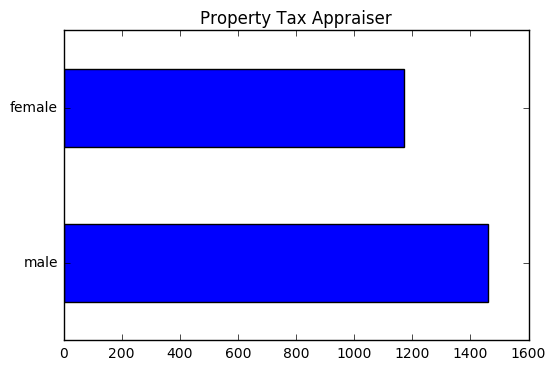

In [529]:
df[df.LICTYPE == 'Property Tax Appraiser'].GENDER.value_counts().plot(kind='barh', title='Property Tax Appraiser')

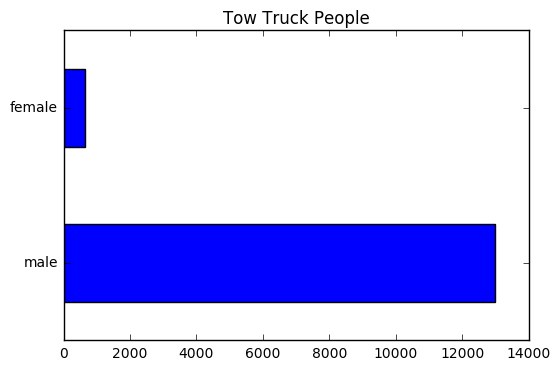

In [530]:
df[df.LICTYPE.str.contains('Tow Truck').fillna(False)].GENDER.value_counts().plot(kind='barh', title='Tow Truck People')

## 34. Calcuate the gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [ ]:
# So when you do .value_counts(), it gives you an index and a value
df[df['GENDER'] == 'male'].LICTYPE.value_counts().head()

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [ ]:
# All of the values_counts() we will be combining
vc_series = [
    df[df['GENDER'] == 'male'].LICTYPE.value_counts(),
    df[df['GENDER'] == 'female'].LICTYPE.value_counts(),
    df[df['GENDER'].isnull()].LICTYPE.value_counts()
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

In [ ]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

In [ ]:
# Rename the columns appropriately
gender_df.columns = ["license", "male", "female", "unknown"]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

In [ ]:
gender_df['total'] = gender_df['male'] + gender_df['female'] + gender_df['unknown']
gender_df['pct_known'] = 100 * (gender_df['male'] + gender_df['female']) / gender_df['total']
gender_df['pct_male'] = 100 * gender_df['male'] / (gender_df['male'] + gender_df['female'])
gender_df['pct_female'] = 100 * gender_df['female'] / (gender_df['male'] + gender_df['female'])
gender_df.fillna(0, inplace=True)
gender_df.head()

## 35. What 10 licenses with more than 2,000 people and under 75% unknown has the most male owners? The most female?

In [ ]:
gender_df[(gender_df['total'] > 2000) & (gender_df['pct_known'] >= 75)].sort_values(by='pct_male', ascending=False).head(10)

In [ ]:
gender_df[(gender_df['total'] > 2000) & (gender_df['pct_known'] >= 75)].sort_values(by='pct_female', ascending=False).head(10)

## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

In [443]:
violations_df = pd.read_csv("violations.csv")
violations_df.head()

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072
2,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066
3,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083
4,The Respondent's license was revoked upon Resp...,HOUSTON,COS20170005470,HARRIS,1209580,"NGUYEN, QUAN M",Respondent's Cosmetology Operator license was ...,2/24/2017,77077


### 38. Combine with your original dataframe to get phone numbers and addresses for each violation

In [445]:
merged_df = violations_df.merge(df, left_on='licenseno', right_on='LICNUMBER')
merged_df

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode,LICTYPE,...,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Esthetician/Manicure Salon,...,FORMAL NAILS,8610 S BRAESWOOD,NaN,HOUSTON TX 77031,0201,HARRIS,77031,7132701521,FM,N
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072,Cosmetology Esthetician/Manicure Salon,...,LUU LUU NAILS & SPA,11200 BRAOD WAY STE 1000,NaN,PEARLAND TX 77584,0039,BRAZORIA,77584,8325337866,FM,N
2,"Respondent failed to disinfect tools, implemen...",HOUSTON,COS20160018700,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,11/30/2016,77072,Cosmetology Esthetician/Manicure Salon,...,LUU LUU NAILS & SPA,11200 BRAOD WAY STE 1000,NaN,PEARLAND TX 77584,0039,BRAZORIA,77584,8325337866,FM,N
3,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066,Cosmetology Esthetician/Manicure Salon,...,FANCY NAILS,8077 A FM 1960 E,NaN,HUMBLE TX 77346,0201,HARRIS,77346,2818525330,FM,N
4,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083,Cosmetology Beauty Salon,...,1 HOLLYWOOD NAILS,14424 BELLAIRE BLVD,NaN,HOUSTON TX 77083,0201,HARRIS,77083,2814956262,CS,N
5,Respondent failed to disinfect shampoo bowls p...,HOUSTON,COS20160003461,HARRIS,742061,"NGUYEN, KIM THUAN-NGOC",Respondent is assessed an administrative penal...,2/3/2017,77074,Cosmetology Beauty Salon,...,4.99 HAIRCUTS II,8442 FONDREN RD,NaN,HOUSTON TX 77074-5616,0201,HARRIS,77074,8324885863,CS,N
6,Respondent failed to keep a record of the date...,KATY,COS20160026587,HARRIS,747353,"NGUYEN, LEDAI NGOC",Respondent is assessed an administrative penal...,1/11/2017,77494,Cosmetology Esthetician/Manicure Salon,...,KING NAILS AND SPA,5929 FM 1463 RD NO 120,NaN,KATY TX 77494,0157,FORT BEND,77494,2816937777,FM,N
7,Respondent failed to keep a record of the date...,HUMBLE,COS20170000591,HARRIS,742122,"NGUYEN, NGA",Respondent is assessed an administrative penal...,1/11/2017,77346,Cosmetology Esthetician/Manicure Salon,...,SAMMIE'S NAILS,8118 FM 1960 EAST,NaN,HUMBLE TX 77346,0201,HARRIS,77346,2818122269,FM,N
8,Respondent failed to keep a record of the date...,HOUSTON,COS20160024172,HARRIS,756241,"NGUYEN, IVANNA",Respondent is assessed an administrative penal...,11/30/2016,77099,Cosmetology Esthetician/Manicure Salon,...,NAILS N NAILS,12600 BISSONNET C 2,NaN,HOUSTON TX 77099,0201,HARRIS,77099,2815758181,FM,N
9,"Respondent failed to clean, disinfect, and ste...",HOUSTON,COS20160025554,HARRIS,1288397,"NGUYEN, TUYEN T",Respondent is assessed an administrative penal...,11/4/2016,77072,Cosmetology Manicurist,...,"NGUYEN, TUYEN THANH",6606 BELLAIRE GARDENS DR,NaN,HOUSTON TX 77072-3841,0201,HARRIS,77072,2814957247,MA,N


In [447]:
# It should be 90 rows, 28 columns
merged_df.shape

(90, 28)

## 39. Find each violation involving a failure involving records. Use a regular expression.

In [454]:
merged_df[merged_df['basis'].str.contains("fail.*recor", regex=True)]

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode,LICTYPE,...,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Esthetician/Manicure Salon,...,FORMAL NAILS,8610 S BRAESWOOD,NaN,HOUSTON TX 77031,0201,HARRIS,77031,7132701521,FM,N
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072,Cosmetology Esthetician/Manicure Salon,...,LUU LUU NAILS & SPA,11200 BRAOD WAY STE 1000,NaN,PEARLAND TX 77584,0039,BRAZORIA,77584,8325337866,FM,N
3,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066,Cosmetology Esthetician/Manicure Salon,...,FANCY NAILS,8077 A FM 1960 E,NaN,HUMBLE TX 77346,0201,HARRIS,77346,2818525330,FM,N
4,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083,Cosmetology Beauty Salon,...,1 HOLLYWOOD NAILS,14424 BELLAIRE BLVD,NaN,HOUSTON TX 77083,0201,HARRIS,77083,2814956262,CS,N
6,Respondent failed to keep a record of the date...,KATY,COS20160026587,HARRIS,747353,"NGUYEN, LEDAI NGOC",Respondent is assessed an administrative penal...,1/11/2017,77494,Cosmetology Esthetician/Manicure Salon,...,KING NAILS AND SPA,5929 FM 1463 RD NO 120,NaN,KATY TX 77494,0157,FORT BEND,77494,2816937777,FM,N
7,Respondent failed to keep a record of the date...,HUMBLE,COS20170000591,HARRIS,742122,"NGUYEN, NGA",Respondent is assessed an administrative penal...,1/11/2017,77346,Cosmetology Esthetician/Manicure Salon,...,SAMMIE'S NAILS,8118 FM 1960 EAST,NaN,HUMBLE TX 77346,0201,HARRIS,77346,2818122269,FM,N
8,Respondent failed to keep a record of the date...,HOUSTON,COS20160024172,HARRIS,756241,"NGUYEN, IVANNA",Respondent is assessed an administrative penal...,11/30/2016,77099,Cosmetology Esthetician/Manicure Salon,...,NAILS N NAILS,12600 BISSONNET C 2,NaN,HOUSTON TX 77099,0201,HARRIS,77099,2815758181,FM,N
10,Respondent failed to dispose of single use ite...,HOUSTON,COS20160022958,HARRIS,711110,"NGUYEN, DUC THI",Respondent is assessed an administrative penal...,10/3/2016,77084,Cosmetology Esthetician/Manicure Salon,...,BEAUTIFUL NAILS,6414 HIGHWAY 6 NORTH,NaN,HOUSTON TX 77084,0201,HARRIS,77084,2818557033,FM,N
14,Respondent failed to keep a record of the date...,HOUSTON,COS20160023083,HARRIS,743934,"NGUYEN, CHANH V",Respondent is assessed an administrative penal...,8/29/2016,77088,Cosmetology Esthetician/Manicure Salon,...,NEW HT NAILS,762 W GULF BANK RD,NaN,HOUSTON TX 77088,0201,HARRIS,77088,2814476950,FM,N
17,Respondent failed to keep a record of the date...,SPRING,COS20160021148,HARRIS,748989,"NGUYEN, TRUONG V",Respondent is assessed an administrative penal...,8/24/2016,77388,Cosmetology Beauty Salon,...,SPRING HERBAL NAILS & SPA,2150 FM 2920 RD SUITE C,NaN,SPRING TX 77388,0201,HARRIS,77388,2815285801,CS,N


## 40. How much money was each fine? Use a regular expression and .str.extract from before.

Unfortunately large troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

In [464]:
merged_df['order'].str.extract("\$([\d,]+)", expand=False)

0       300
1       500
2       750
3     1,875
4       375
5     1,800
6     1,125
7       750
8       925
9       575
10    1,000
11      550
12      500
13      750
14    1,125
15      500
16      500
17    1,500
18      375
19      500
20      500
21      750
22      500
23    1,250
24      750
25    1,500
26      400
27      500
28    2,250
29      375
      ...  
60      550
61      625
62    1,625
63      375
64      375
65      375
66      500
67      500
68      500
69    1,000
70    1,000
71    2,200
72      875
73      750
74      750
75      750
76    1,000
77      375
78      250
79      225
80      750
81      875
82      750
83      625
84    1,695
85      150
86      575
87      500
88    1,000
89    1,250
Name: order, dtype: object

## 41. Clean it (no commas, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

In [467]:
merged_df['fine'] = merged_df['order'].str.extract("\$([\d,]+)", expand=False).str.replace(",","").astype(int)
merged_df.head()

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode,LICTYPE,...,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,fine
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Esthetician/Manicure Salon,...,8610 S BRAESWOOD,NaN,HOUSTON TX 77031,0201,HARRIS,77031,7132701521,FM,N,300
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072,Cosmetology Esthetician/Manicure Salon,...,11200 BRAOD WAY STE 1000,NaN,PEARLAND TX 77584,0039,BRAZORIA,77584,8325337866,FM,N,500
2,"Respondent failed to disinfect tools, implemen...",HOUSTON,COS20160018700,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,11/30/2016,77072,Cosmetology Esthetician/Manicure Salon,...,11200 BRAOD WAY STE 1000,NaN,PEARLAND TX 77584,0039,BRAZORIA,77584,8325337866,FM,N,750
3,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066,Cosmetology Esthetician/Manicure Salon,...,8077 A FM 1960 E,NaN,HUMBLE TX 77346,0201,HARRIS,77346,2818525330,FM,N,1875
4,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083,Cosmetology Beauty Salon,...,14424 BELLAIRE BLVD,NaN,HOUSTON TX 77083,0201,HARRIS,77083,2814956262,CS,N,375


## 42. Which orders results in the top fines?

In [470]:
merged_df.sort_values(by='fine', ascending=False)

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode,LICTYPE,...,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,fine
40,Respondent failed to keep a record of the date...,PASADENA,COS20160005971,HARRIS,750887,"NGUYEN, CY VAN",Respondent is assessed an administrative penal...,2/16/2016,77505,Cosmetology Esthetician/Manicure Salon,...,5865 FAIRMONT PKWY,NaN,PASADENA TX 77505,0201,HARRIS,77505,2819981000,FM,N,4000
28,Respondent failed to follow whirlpool foot spa...,HOUSTON,COS20160010390,HARRIS,746451,"NGUYEN, THANH DUONG",Respondent is assessed an administrative penal...,5/18/2016,77064,Cosmetology Esthetician/Manicure Salon,...,22625 TOMBALL PARKWAY STE 835,NaN,TOMBALL TX 77375,0201,HARRIS,77375,8324344781,FM,N,2250
71,"Respondent failed to disinfect tools, implemen...",HOUSTON,COS20140013768,HARRIS,711709,"NGUYEN, LINH CHI",Respondent is assessed an administrative penal...,4/13/2015,77065,Cosmetology Esthetician/Manicure Salon,...,320A W RANKIN RD,NaN,HOUSTON TX 77090,0201,HARRIS,77090,2818735734,FM,N,2200
3,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066,Cosmetology Esthetician/Manicure Salon,...,8077 A FM 1960 E,NaN,HUMBLE TX 77346,0201,HARRIS,77346,2818525330,FM,N,1875
5,Respondent failed to disinfect shampoo bowls p...,HOUSTON,COS20160003461,HARRIS,742061,"NGUYEN, KIM THUAN-NGOC",Respondent is assessed an administrative penal...,2/3/2017,77074,Cosmetology Beauty Salon,...,8442 FONDREN RD,NaN,HOUSTON TX 77074-5616,0201,HARRIS,77074,8324885863,CS,N,1800
84,Respondent failed to keep a record of the date...,HOUSTON,COS20140015709,HARRIS,724124,"NGUYEN, LIEM T",Respondent is assessed an administrative penal...,9/29/2014,77028,Cosmetology Esthetician/Manicure Salon,...,11510 SPACE CENTER BLVD.,SUITE C,HOUSTON TX 77059,0201,HARRIS,77059,2819981053,FM,N,1695
46,Respondent failed to wash towels in hot water ...,HOUSTON,COS20150015433,HARRIS,734013,"NGUYEN, JOHN H",Respondent is assessed an administrative penal...,1/11/2016,77084,Cosmetology Esthetician/Manicure Salon,...,31303 FM 2920 SUIT J,NaN,WALLER TX 77484,0473,WALLER,77484,7138979795,FM,N,1650
62,Respondent operated a cosmetology salon with a...,HOUSTON,COS20150010173,HARRIS,752114,"NGUYEN, JENNY YEN BACH",Respondent is assessed an administrative penal...,7/13/2015,77064,Cosmetology Manicure Salon,...,13750 N ELDRIDGE PKWY STE 4,NaN,CYPRESS TX 77429-2786,0201,HARRIS,77429,2812579995,MS,N,1625
32,Respondent failed to keep a record of the date...,LA PORTE,COS20160012089,HARRIS,741785,"NGUYEN, TRAM B",Respondent is assessed an administrative penal...,4/26/2016,77571,Cosmetology Esthetician/Manicure Salon,...,1426 W FAIRMONT PKWY,NaN,LA PORTE TX 77571,0201,HARRIS,77571,2814702211,FM,N,1600
17,Respondent failed to keep a record of the date...,SPRING,COS20160021148,HARRIS,748989,"NGUYEN, TRUONG V",Respondent is assessed an administrative penal...,8/24/2016,77388,Cosmetology Beauty Salon,...,2150 FM 2920 RD SUITE C,NaN,SPRING TX 77388,0201,HARRIS,77388,2815285801,CS,N,1500


## 43. Are you still here???

I'm sure impressed.